In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the encoded dataset
df_encoded = pd.read_csv('encoded_test.csv')

In [3]:
# Identify numerical columns for outlier detection (focus on continuous features; exclude IDs, ratings, and encoded categoricals)
numerical_cols = [
    'remainder__Age', 
    'remainder__Flight Distance', 
    'remainder__Departure Delay in Minutes', 
    'remainder__Arrival Delay in Minutes'
]
print("Numerical columns for outlier removal:", numerical_cols)

Numerical columns for outlier removal: ['remainder__Age', 'remainder__Flight Distance', 'remainder__Departure Delay in Minutes', 'remainder__Arrival Delay in Minutes']


In [5]:
# Function to remove outliers using IQR method
def remove_outliers(df, cols):
    df_out = df.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter rows within bounds
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

print("\nShape before outlier removal:", df_encoded.shape)


Shape before outlier removal: (25976, 26)


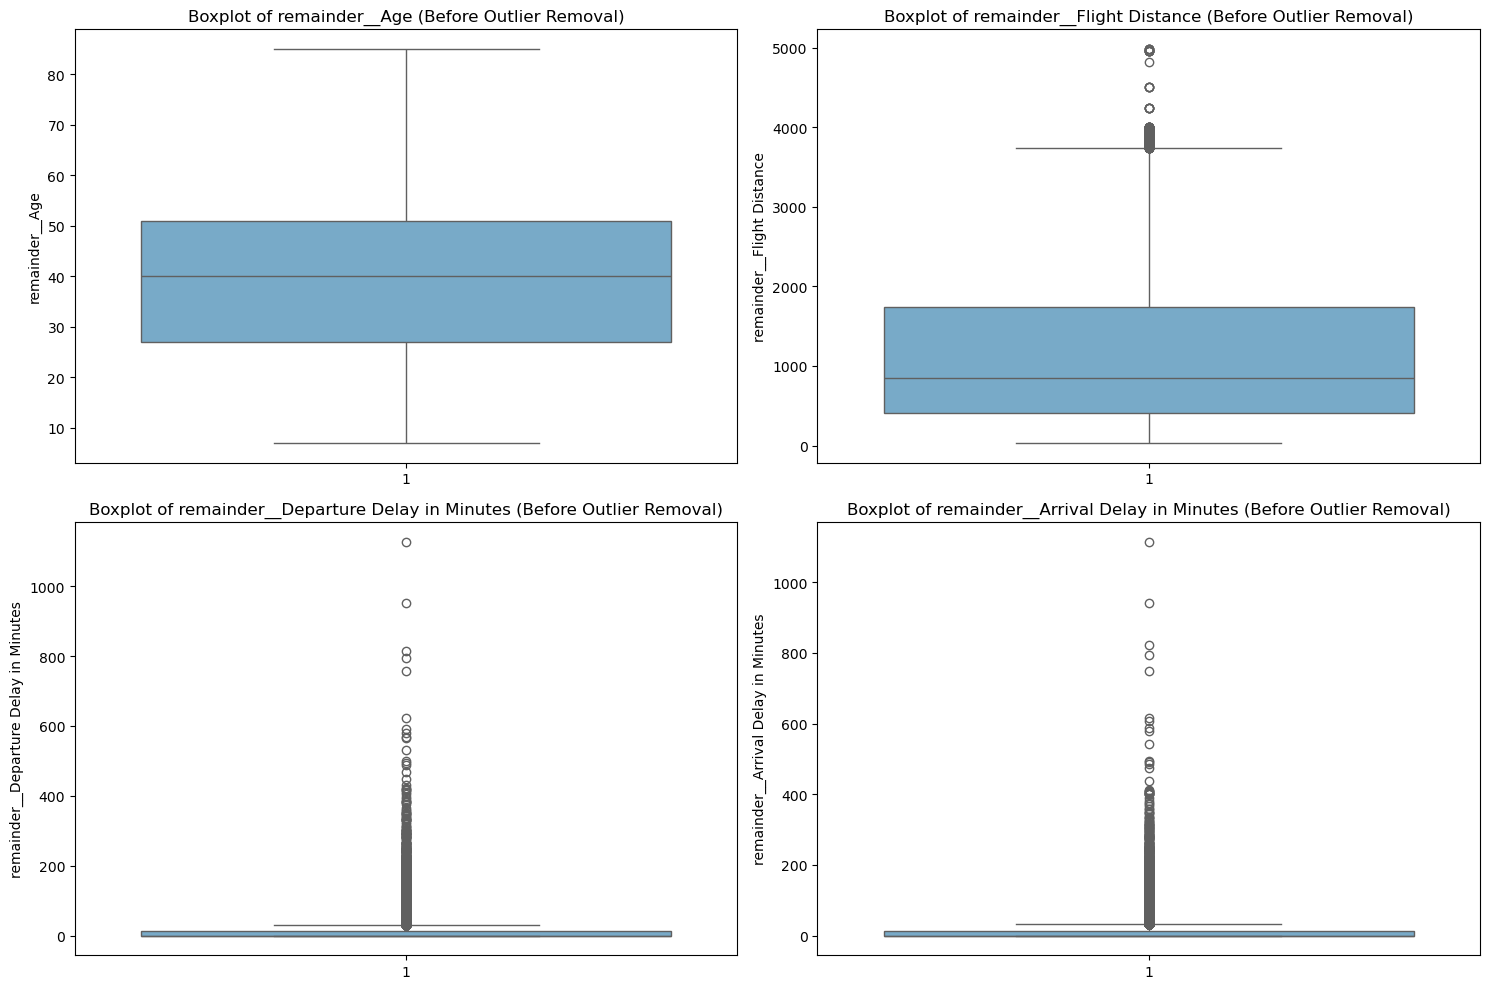

In [7]:
plt.figure(figsize=(15, 10))  
for i, col in enumerate(numerical_cols, 1):  
    plt.subplot(2, 2, i)  
    sns.boxplot(x=[1] * len(df_encoded), y=df_encoded[col], hue=[1] * len(df_encoded), palette="Blues", legend=False)  
    plt.title(f'Boxplot of {col} (Before Outlier Removal)')  
    plt.ylabel(col)  
    plt.xlabel("")  
plt.tight_layout()  
plt.show() 

In [9]:
df_no_outliers = remove_outliers(df_encoded, numerical_cols)

In [11]:
print("Shape after outlier removal:", df_no_outliers.shape)

Shape after outlier removal: (18822, 26)


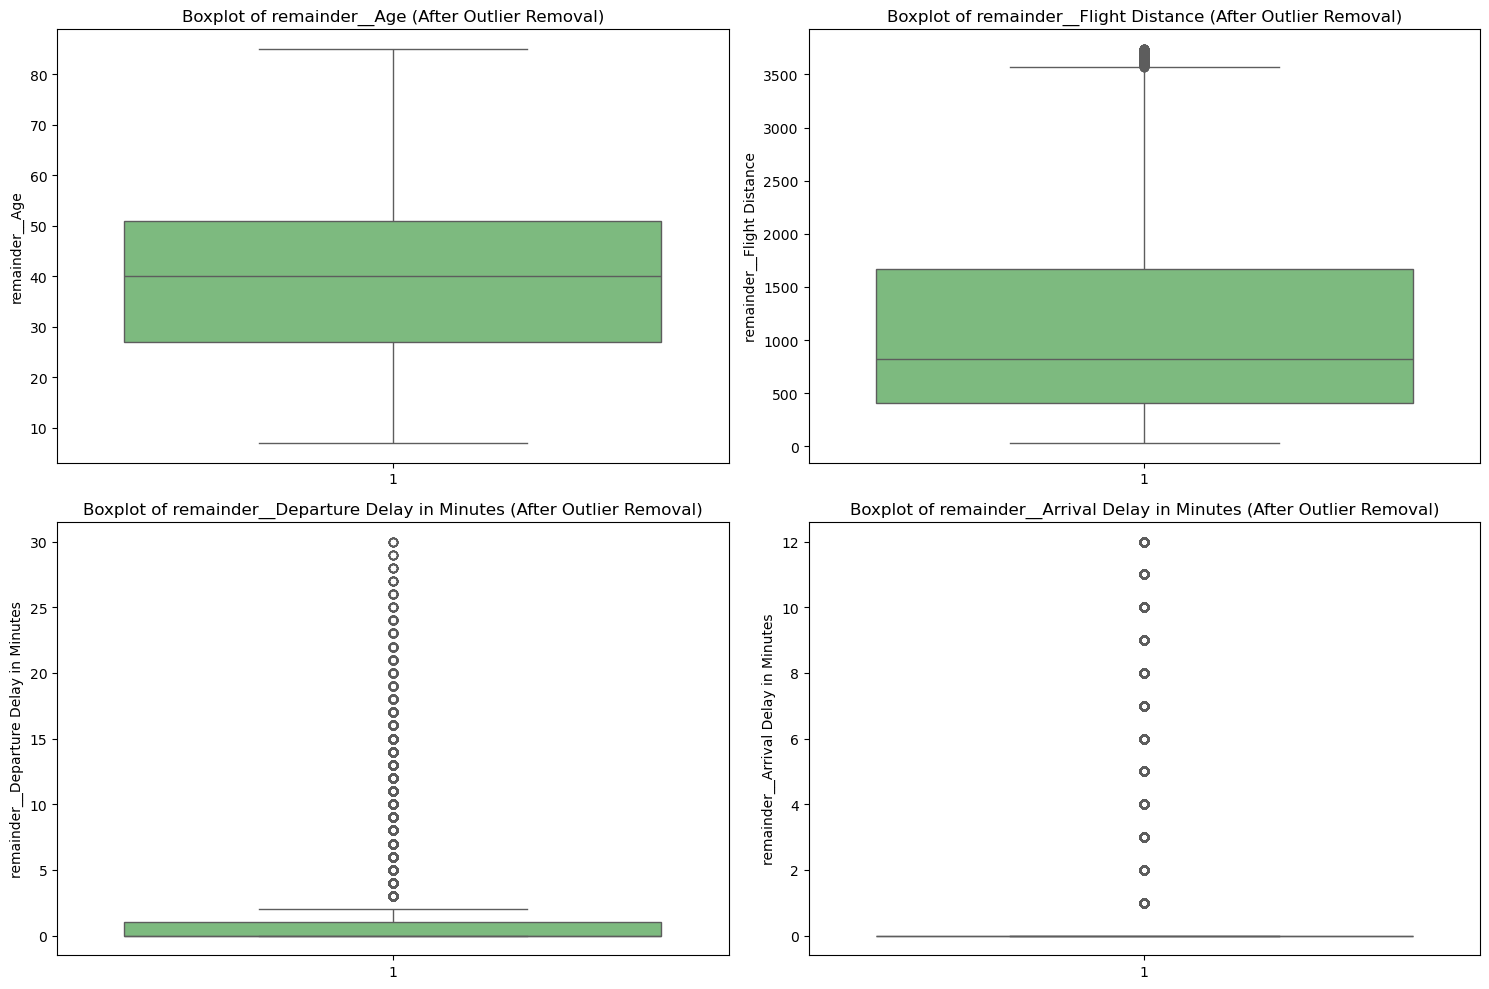

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=[1] * len(df_no_outliers), y=df_no_outliers[col], hue=[1] * len(df_no_outliers), palette="Greens", legend=False)
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.ylabel(col)
    plt.xlabel("")
plt.tight_layout()
plt.show()

In [15]:
df_no_outliers.to_csv('no_outliers_test.csv', index=False)
print("\nDataset without outliers saved as 'no_outlier_removal.csv'")


Dataset without outliers saved as 'no_outlier_removal.csv'
